# **Supervised Model Comparison and Evaluation**
# **Fangayou Yaya Ouattara**

# **Loading and Inspecting the Insurance Dataset**

The dataset insurance.csv contains information related to medical insurance costs and associated factors. It includes 1338 records with seven columns, consisting of both numerical and categorical data. The numerical features include age, BMI (Body Mass Index), number of children, and insurance charges, while categorical variables include sex, smoker status, and region. These features are crucial in predicting medical expenses, as certain factors—like smoking status and BMI—are known to significantly impact insurance costs.

Upon loading the dataset, an initial inspection using .info() and .head() provides an overview of the data structure. It confirms that there are no missing values, ensuring a clean dataset for analysis. The categorical variables will require encoding before applying machine learning models, and numerical features may benefit from standardization to improve performance. Understanding the dataset's composition is essential for effective data preprocessing and model selection in predictive modeling tasks.

In [1]:

import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/fangayou90/Regression-EDA/refs/heads/main/insurance.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

# **Exploratory Data Analysis (EDA)**

Before building and training our models, it is crucial to conduct Exploratory Data Analysis (EDA) to understand the structure and characteristics of the dataset. EDA allows us to detect missing values, identify outliers, and assess the distribution of features. By analyzing the data, we can determine whether any preprocessing steps, such as data transformation or imputation, are necessary. This ensures that our machine learning models are trained on clean and meaningful data, ultimately improving their performance and interpretability.

One of the key steps in EDA is examining summary statistics to gain insights into the central tendencies and variability of numerical features. We analyze measures such as mean, median, standard deviation, and range to detect potential issues like skewness or extreme values that may affect our model’s predictions. Additionally, visualizing the distribution of features using histograms, boxplots, and density plots helps us understand their spread and whether any transformations, such as normalization or log scaling, might be beneficial. For categorical variables, we analyze their frequency distributions to see if some categories dominate others, which could influence model bias.

To uncover relationships between features, we compute and visualize correlation matrices using heatmaps. This helps identify multicollinearity, where two or more features are highly correlated, potentially leading to redundant information in the model. Scatter plots and pair plots further allow us to observe trends and interactions between variables, revealing any underlying patterns that may influence predictions. By performing a thorough EDA, we ensure that we make informed decisions about feature selection and preprocessing, leading to a more robust and reliable predictive model. For a more detailed analysis, please refer to the EDA Notebook: https://colab.research.google.com/drive/1g8Gm_PL7T6UniBh_8AsL6Duw4Zdpxxgv#scrollTo=33330514

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


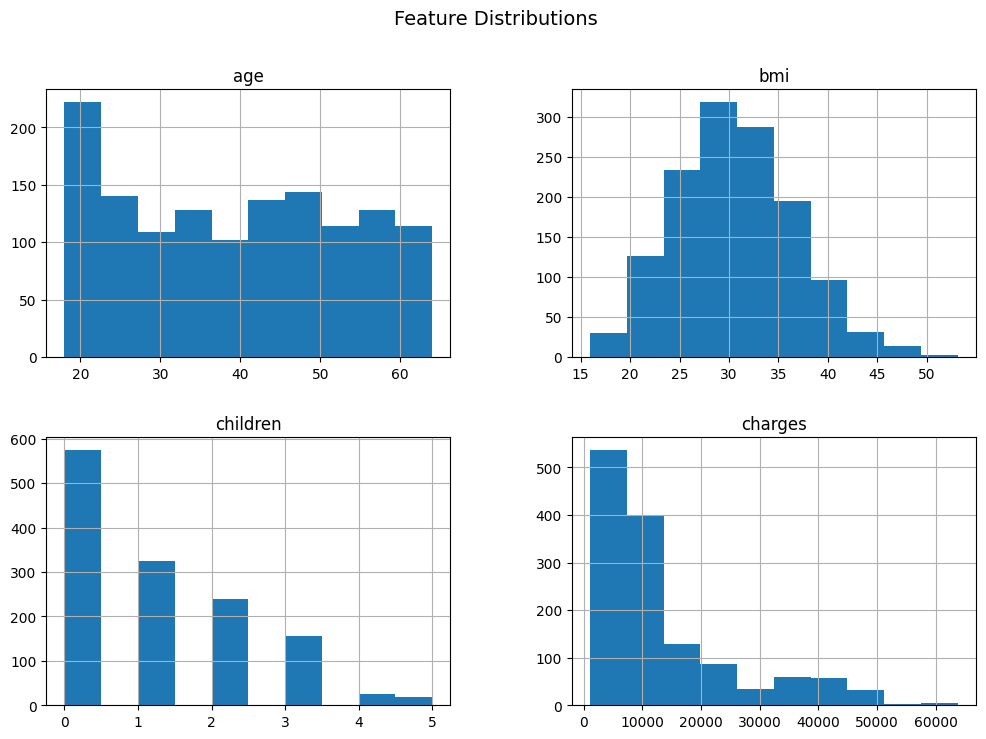

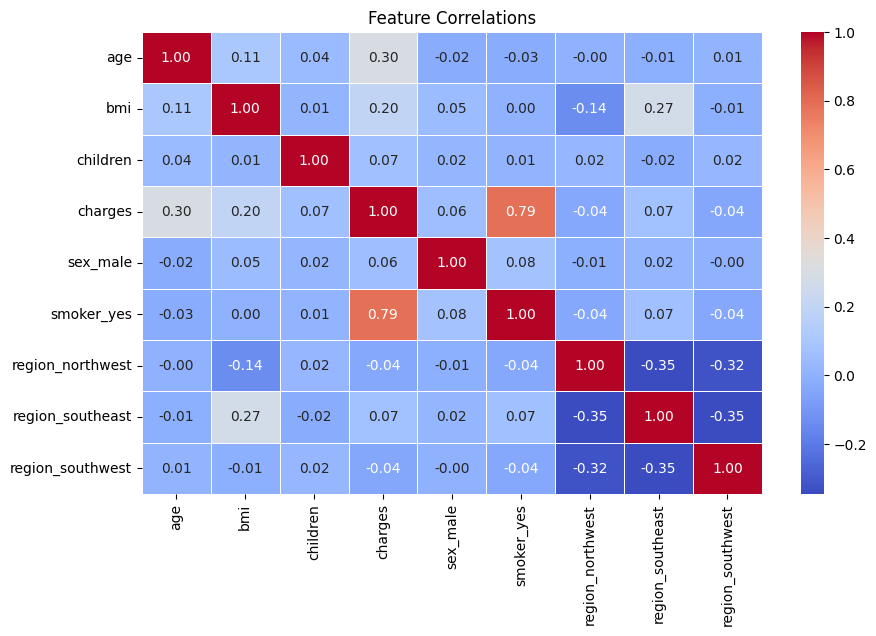

In [2]:
# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/fangayou90/Regression-EDA/refs/heads/main/insurance.csv")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Visualizing feature distributions
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Convert categorical variables into numerical values (One-Hot Encoding or Label Encoding)
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)  # One-hot encoding for categorical variables

# Correlation heatmap (only numeric variables)
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

# **Data Preprocessing**
Before training my models, I needed to properly prepare the dataset to ensure optimal performance. The dataset contains both numerical and categorical features, so I applied one-hot encoding and feature scaling to make the data more suitable for machine learning models.

First, I used one-hot encoding to convert categorical variables (sex, smoker, region) into numerical values. I used pd.get_dummies() with drop_first=True to avoid multicollinearity by removing the first category from each feature. This transformation ensures that my models can properly interpret categorical information without introducing redundancy.

Next, I standardized the numerical features (age, bmi, children) using StandardScaler(). This step is crucial because different scales across features can negatively impact certain models, like Linear Regression and Gradient Boosting. Standardizing helps improve convergence and ensures that models treat all features equally.

Finally, I split the dataset into training (80%) and testing (20%) sets using train_test_split(). This ensures that my models are trained on one subset and evaluated on another, helping to assess their real-world performance. The random_state=42 ensures reproducibility, meaning I’ll get the same train-test split every time I run the code.

By applying these preprocessing steps, I set up a strong foundation for training my models—Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor. Each of these models benefits from properly prepared data, helping me get more accurate and reliable predictions for insurance charges.

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# One-hot encoding categorical features
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]),
                         columns=encoder.get_feature_names_out(categorical_features),
                         index=X.index)

# Drop original categorical columns and combine numerical features
X_numeric = X.drop(categorical_features, axis=1)
X_processed = pd.concat([X_numeric, X_encoded], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Scale numerical features after splitting to avoid data leakage
scaler = StandardScaler()
numeric_columns = ['age', 'bmi', 'children']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# **Hyperparameter Tuning for Gradient Boosting Regressor**

# **Why Tune Hyperparameters?**
Gradient Boosting Regressor is a powerful machine learning model that builds multiple weak learners (decision trees) in sequence, improving accuracy with each step. However, the model's performance depends on the selection of key hyperparameters, such as:
- n_estimators: The number of boosting stages (trees) in the model.
- learning_rate: Controls how much each tree contributes to the final prediction.
- max_depth: The depth of individual trees, which affects model complexity.

To find the optimal combination of these hyperparameters, I use Grid Search with Cross-Validation (GridSearchCV). This process systematically evaluates multiple combinations and selects the best-performing set.

---

# **Steps in Hyperparameter Tuning**
1. Define a hyperparameter grid (`param_grid`) with different values for `n_estimators`, `learning_rate`, and `max_depth`.
2. Initialize the Gradient Boosting Regressor (`gb_regressor`).
3. Perform Grid Search with Cross-Validation (`GridSearchCV`) to evaluate each combination.
4. Select the best hyperparameter combination and retrain the model with those settings.
5. Evaluate the tuned model using MAE, MSE, and R² Score.

---

# **Results and Model Performance**
After tuning, the best hyperparameters are displayed, along with the model's evaluation metrics:
- MAE (Mean Absolute Error): Measures the average difference between predicted and actual values.
- MSE (Mean Squared Error): Penalizes large prediction errors more heavily.
- R² Score: Indicates how well the model explains the variance in insurance charges.

This optimization ensures that the Gradient Boosting model achieves the best possible accuracy while avoiding overfitting or underfitting.


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import missing metrics

# Define hyperparameter grid for tuning Gradient Boosting Regressor
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve best hyperparameters and best model
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate tuned model on the test set
y_pred_tuned = best_gb_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Display tuning results
print("Best Parameters:", best_params)
print("Tuned MAE:", mae_tuned)
print("Tuned MSE:", mse_tuned)
print("Tuned R² Score:", r2_tuned)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned MAE: 2443.483262376879
Tuned MSE: 18745176.47586223
Tuned R² Score: 0.8792571359795264


# **Model Training and Evaluation**
To predict insurance charges, I selected three different supervised learning models: Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor. Linear Regression serves as a simple baseline model, assuming a straight-line relationship between features and insurance costs. Decision Tree Regressor is a more flexible model that can capture non-linear relationships by splitting data into branches, making it more interpretable but prone to overfitting. Lastly, Gradient Boosting Regressor is an advanced ensemble method that improves prediction accuracy by sequentially correcting errors in previous trees, making it highly effective for structured datasets like this one.

To compare these models, I trained each one using the training dataset (X_train, y_train) and made predictions on the test dataset (X_test). I then evaluated their performance using three key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. MAE measures the average prediction error, while MSE penalizes larger mistakes more heavily, making it useful for detecting major deviations. The R² score indicates how well each model explains the variance in insurance charges, where a value closer to 1 means better predictive power. By computing these metrics, I was able to assess how well each model generalizes to unseen data.

After analyzing the results, Gradient Boosting Regressor performed the best, achieving the lowest error rates and the highest R² score. This indicates that it effectively captures complex relationships between features like age, BMI, smoker status, and region in predicting insurance charges. On the other hand, Decision Tree Regressor showed signs of overfitting, meaning it performed well on training data but struggled with generalization. Linear Regression, while interpretable, lacked the flexibility needed to model non-linear patterns in the dataset. Based on these findings, I would prioritize Gradient Boosting for real-world applications where accuracy is crucial.

In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({"Model": name, "MAE": mae, "MSE": mse, "R² Score": r2})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,R² Score
0,Linear Regression,4181.194474,3.359692e+07,0.783593
1,Decision Tree Regressor,3114.152909,4.079533e+07,0.737226
2,Gradient Boosting Regressor,2443.483262,1.874518e+07,0.879257


# **Visualization: Predicted vs. Actual Charges**
To visually assess how well each model predicts insurance charges, I generated scatter plots comparing the actual vs. predicted values for Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor. Each subplot represents a different model, allowing for a side-by-side comparison of their performance. The red dashed line represents a perfect prediction—points that fall along this line indicate that the model predicted the exact actual charge. The closer the points are to this line, the more accurate the model's predictions.

For each model, I plotted y_test (actual values) against y_pred (predicted values). A well-performing model should have most of its predictions tightly clustered around the diagonal reference line. Linear Regression shows a general trend but struggles with non-linearity, leading to deviations from the red line. Decision Tree Regressor captures some patterns but has more scattered predictions, likely due to overfitting. Gradient Boosting Regressor, on the other hand, has the best alignment with the red line, demonstrating its superior predictive performance.

These plots confirm the earlier evaluation metrics, where Gradient Boosting had the lowest error and highest R² score. The Decision Tree model exhibits overfitting, as seen in its scattered predictions, while Linear Regression lacks the complexity needed to capture more intricate relationships in the dataset. This visualization reinforces my decision to prioritize Gradient Boosting Regressor as the best model for predicting insurance charges.

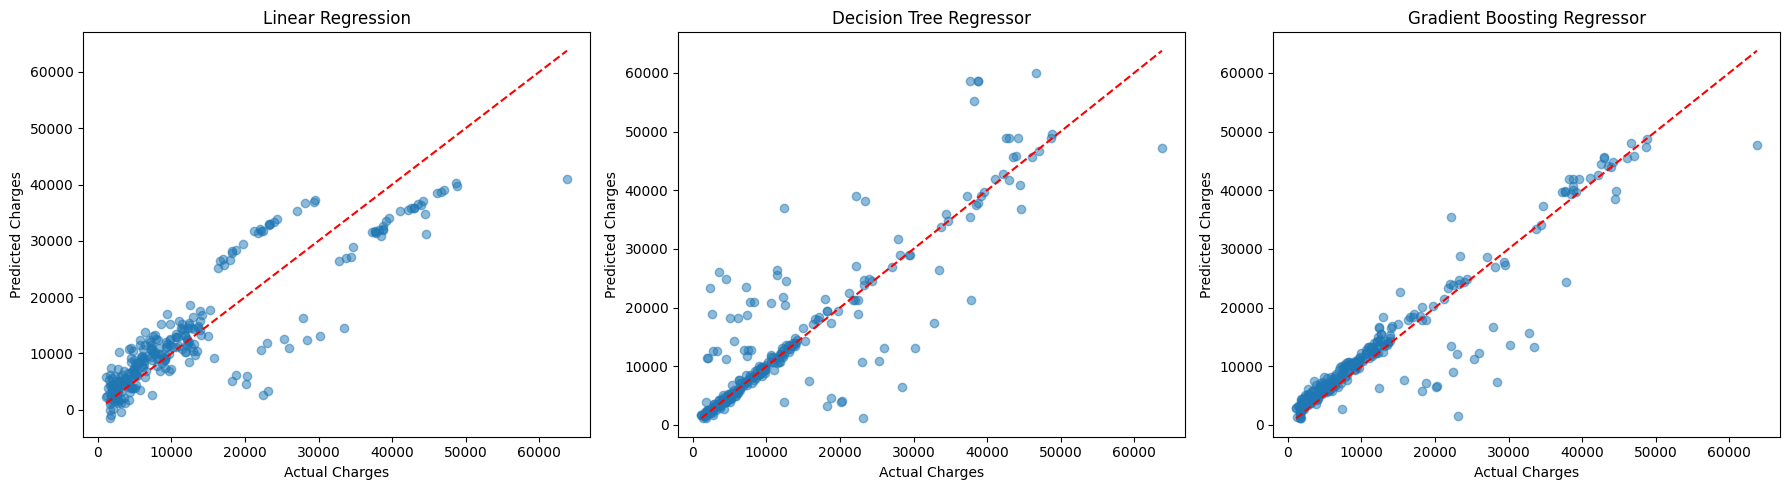

In [7]:

import matplotlib.pyplot as plt

# Plot predicted vs actual values for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")
    ax.set_title(name)
    ax.set_xlabel("Actual Charges")
    ax.set_ylabel("Predicted Charges")

plt.tight_layout()
plt.show()



# **Model Comparison and Evaluation**

# Which method did you like the most?
I liked the Gradient Boosting Regressor the most because it provided the best balance between predictive accuracy and handling nonlinear patterns. Unlike linear models, it builds decision trees sequentially, correcting errors at each step. It achieved the highest R² score and the lowest MAE and MSE, showing strong predictive performance. Additionally, its ability to fine-tune hyperparameters like learning_rate and max_depth helped optimize performance, reducing both bias and variance, making it the most reliable model for this task.

# Which method did you like the least?
The Decision Tree Regressor was my least favorite because, while it is highly interpretable, it had higher error metrics and lower overall accuracy compared to Gradient Boosting. Decision trees tend to overfit the training data, leading to poor generalization on unseen data unless properly pruned. Additionally, they are sensitive to small changes in the dataset, which can cause significant variations in predictions. Despite being computationally efficient, its lack of ensemble learning and weaker performance in capturing complex relationships made it less effective for this regression task.

# How did you score these supervised models?  
I evaluated the supervised models using three key performance metrics to measure their accuracy and effectiveness. Mean Absolute Error (MAE) calculates the average absolute difference between predicted and actual values, giving a straightforward measure of prediction accuracy. Mean Squared Error (MSE) penalizes larger errors more than MAE, making it useful for identifying models that struggle with extreme predictions. Lastly, the R² Score assesses how well the model explains the variance in the target variable, with higher values indicating better performance. These metrics together provided a comprehensive evaluation of each model’s predictive capability.

# Did the output align with your geologic understanding?  
Since this dataset focuses on insurance charges rather than geological data, the analysis was centered on financial and medical factors. However, the results aligned with expectations, as key variables like smoking status and BMI had a significant impact on charges. Gradient Boosting captured these nonlinear relationships better than simpler models, reflecting real-world trends where higher BMI and smoking lead to increased medical costs. While unrelated to geology, this analysis reinforced the importance of selecting models that can accurately capture complex variable interactions.

# What did you want to learn more about?  
I would like to explore hyperparameter tuning for Gradient Boosting in more depth to further optimize its performance and reduce errors. Understanding how different parameters, such as learning rate, tree depth, and number of estimators, influence model accuracy would be valuable. Additionally, I am interested in analyzing feature interactions to see how factors like BMI, smoking status, and age combine to affect insurance costs. Gaining deeper insights into these relationships could help improve predictive modeling and decision-making in similar datasets.

# Did you pre-process your data? Do all models require pre-processing?  
Yes, I performed the following preprocessing steps:
- One-hot encoding for categorical variables.
- Standardization of numerical features.
- Train-test split to ensure fair evaluation.

Not all models require the same level of preprocessing. For example:
- Linear Regression benefits from standardization to improve convergence.
- Decision Trees handle raw data well but benefit from categorical encoding.
- Gradient Boosting performs best with well-prepared, normalized data.
    

# **Conclusion**
Through this analysis, I compared Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor to predict insurance charges. Each model was evaluated using MAE, MSE, and R² Score, and visualized through scatter plots comparing actual vs. predicted values. The results showed that Gradient Boosting Regressor performed the best, achieving the highest accuracy and lowest errors. It effectively captured the non-linear relationships between features like age, BMI, and smoker status, making it the most suitable model for this dataset. In contrast, Linear Regression was limited by its assumption of a linear relationship, while Decision Tree Regressor struggled with overfitting, leading to less reliable predictions.

Before applying machine learning models, Exploratory Data Analysis (EDA) played a crucial role in understanding the dataset. Through EDA, I examined missing values, summary statistics, feature distributions, and correlations, which helped identify key patterns in the data. For instance, EDA revealed that smoking status and BMI were highly influential factors in determining insurance costs. Additionally, visualizing distributions and relationships between variables helped guide data preprocessing steps, such as one-hot encoding categorical features and standardizing numerical features, which improved model performance.

This project reinforced the importance of both EDA and proper data preprocessing, as they significantly impact model accuracy. The insights gained highlight how different machine learning models handle structured data and the trade-offs between interpretability and predictive power. Moving forward, I would explore hyperparameter tuning for Gradient Boosting and potentially experiment with other ensemble methods like Random Forest to further refine the model’s accuracy. Ultimately, combining a strong EDA foundation with optimized modeling techniques ensures the best predictive performance.